# 3.7 Measures of Association
In Chapter 2 we brought up visualizations like scatterplots to assess whether two variables had some type of (often linear) relationship. We'll now look at numerical measures of association that quantify the direction and strength of the linear relationship between two variables. We should note though that these measures may not be appropriate when the underlying relationship between the variables is nonlinear.

A numerical measure that reveals the direction of the linear relationship between two variables is called the **covariance**. We use $s_{xy}$ to refer to the sample covariance, and $\sigma_{xy}$ to refer to the population covariance.

The covariance measures the direction of the linear relationship between two variables. For values $(x_1, y_1), ..., (x_n, y_n)$, the sample covariance is computed as.
$$
s_{xy} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{n-1}
$$
For the population we have $(x_1, y_1), ..., (x_N, y_N)$, the population covariance is computed as.
$$
\sigma_{xy} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{N}
$$
The covariance can take a negative value or positive. A value of zero indicates no linear relationship.

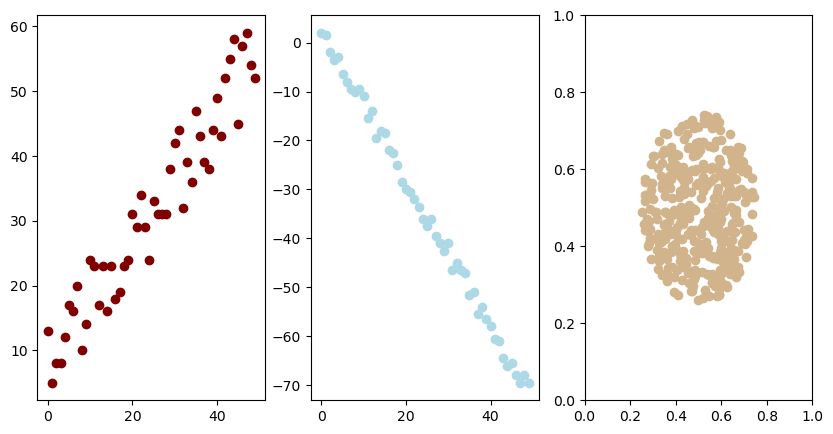

In [34]:
# Example visualizations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# First series
x = [x for x in range(50)]
y = x + np.random.randint(0, 15, 50) 

# Second series
y2 = [-1.5 * z for z in x] + np.random.randint(0, 5, 50)

# Third series
x2, y3 = np.random.uniform(0,1,2000), np.random.uniform(0,1,2000)
x2y3 = [(x,y) for x,y in zip(x2,y3)]
df = pd.DataFrame(x2y3)
df['circ'] = np.where((df.iloc[:,0]-0.5)**2 + (df.iloc[:,1]-0.5)**2 <= (1/16), 
                      1, 0)
circle_mask = df['circ'] == 1
df = df[circle_mask]


# Graph.
fig, (s1, s2, s3) = plt.subplots(1, 3, figsize=(10,5))

s1.scatter(x, y, c='maroon')

s2.scatter(x, y2, c='lightblue')

s3.scatter(df[0], df[1], c='tan')
s3.set_ylim([0,1])
s3.set_xlim([0,1])

plt.show()

In [35]:
# Function to get covariance.
def get_cov(x, y):
    x_bar = sum(x) / len(x)
    y_bar = sum(y) / len(y)

    diff1 = [i - x_bar for i in x]
    diff2 = [j - y_bar for j in y]

    cov_xy = sum([n*m for n,m in zip(diff1, diff2)]) / (len(x)-1)
    return round(cov_xy,4)

print('First series cov:', get_cov(x,y))
print('Second seies cov:', get_cov(x,y2))
print('Third seies cov:', get_cov(df[0],df[1]))

First series cov: 207.1224
Second seies cov: -319.352
Third seies cov: 0.0002


As you can see, the covariance tells us about linear and not nonlinear relationships. 

1) A negative value indicates a negative linear relationship (series 2). On average, if x is above its mean, then y tends to be below its mean, and vice versa.
2) A positive value for covariance indicates a positive linear relationship between the two variables. On average, if x is above its mean, then y tends to be above its mean, and vice versa (series 1).
3) A zero value indicates no linear relationship (series 3).

Note that the covariance is difficult to interpret because it is sensitive to units of measurement. The covariance for two variables might be 50 and for two others could be in the millions. All we know is that they're positively related, we don't know much about the strength of their relation. 

An easier measure to interpret is the **correlation coefficient**; it describes both the direction and the strength of the linear relationship between x and y. We use $r_{xy}$ to denote the sample correlation and $\rho_{xy}$ to denote the population correlation.

We compute these as.
$$
r_{xy} = \frac{s_{xy}}{s_{x} s_{y}}
$$
$$
\rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x} \sigma_{y}}
$$
The correlation coefficient is unit-free! Since the units cancel via dividing by the standard deviations of the variables. The value of the correlation coefficient falls between $[-1,1]$. A correlation coefficient of 1 indicates a pefectly positive, linear relationship. While a value of -1 indicates a perfectly negative linear relationship. To show the interpretive value consider an example with a coefficient of $-0.8$ and $0.12$. The former indicates a strong negative relation, while the latter indicates a weak positive one.

In [36]:
""" Example 3.24
Find the cov and corr
for Growth and Value.
"""
gv = pd.read_csv('Growth_Value.csv', index_col=0)
gv.head(5)

,Growth,Value
Year,,
1984,-5.50,-8.59
1985,39.91,22.10
1986,13.03,14.74
1987,-1.70,-8.58
1988,16.05,29.05


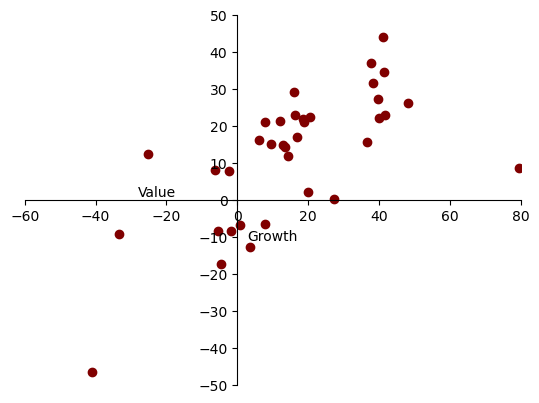

In [37]:
# Visualize growth & value.
fig, ax = plt.subplots()

ax.scatter(gv.Growth, gv.Value, c='maroon')

ax.set_xticks([x*-20 for x in range(-6, 8, 1)])
ax.set_xlim([-60, 80])

ax.set_yticks([y*-10 for y in range(-5, 6, 1)])
ax.set_ylim([-50, 50])

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

ax.set_ylabel('Value', rotation=0, labelpad=30)
ax.set_xlabel('Growth')
plt.show()

In [38]:
cov_gv = get_cov(gv.Value, gv.Growth)
print('Covariance:', cov_gv)

Covariance: 285.6054


In [39]:
import math
g_stddev = math.sqrt(sum((gv.Growth - gv.Growth.mean())**2)/(len(gv)-1))
v_stddev = math.sqrt(sum((gv.Value - gv.Value.mean())**2)/(len(gv)-1))

corr_gv = (cov_gv) / (g_stddev*v_stddev)
print('Correlation:', round(corr_gv,3))

Correlation: 0.667


Notice that the covariance indicates a positive relationship. On average, when growth is above its mean so too is value and vice-versa. The correlation of $0.667$ indicates a moderate to strong, positive linear relationship between the two. We should note that investors are advised to spread their risk between assets. Also called diversification. If two assets are correlated then they will both perform similarly. But if assets don't have a strong positive correlation, when one does poorly the other may still do well!